In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../../data/Capital_Projects.csv", index_col=0)

In [3]:
df.head()

,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
Date Reported As Of,,,,,,,,,,,,,,,
05/01/2014 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Design,09/23/2013,1.829810e+08,-1915400.0,-4318643.37,01/14/2020,1.0,270.0
02/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.687518e+08,-14229191.0,-4318643.37,07/19/2020,187.0,270.0
08/01/2015 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction Procurement,09/23/2013,1.655324e+08,-3219322.0,-4318643.37,08/08/2020,20.0,270.0
01/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,3743944.0,-4318643.37,04/01/2020,-129.0,270.0
06/01/2016 12:00:00 AM,3,26th Ward Waste Water Treatment Plant Prelimin...,The 26th Ward WWTP is mandated to be upgraded ...,Wastewater Treatment,Brooklyn,DEP,DEP,Construction,09/23/2013,1.692764e+08,2.0,-4318643.37,04/13/2020,12.0,270.0


In [4]:
df.Borough.astype(str)

Date Reported As Of
05/01/2014 12:00:00 AM    Brooklyn
02/01/2015 12:00:00 AM    Brooklyn
08/01/2015 12:00:00 AM    Brooklyn
01/01/2016 12:00:00 AM    Brooklyn
06/01/2016 12:00:00 AM    Brooklyn
                            ...   
09/01/2019 12:00:00 AM         nan
09/01/2019 12:00:00 AM         nan
09/01/2019 12:00:00 AM         nan
09/01/2019 12:00:00 AM         nan
09/01/2019 12:00:00 AM         nan
Name: Borough, Length: 2259, dtype: object

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of Categories in this dataset such as {}... \n".format(len(df.Category.unique()),
                                                                           ", ".join(df.Category.unique()[0:5])))

print("There are {} different projects in this dataset".format(len(df["Project Name"].unique())))

There are 2259 observations and 15 features in this dataset. 

There are 22 types of Categories in this dataset such as Wastewater Treatment, Water Supply, Parks, Bridges, Ferries... 

There are 377 different projects in this dataset


## Text Classification/WORD CLOUD FOR THE CATEGORIES

In [6]:
# Start with General:
text = ', '.join(df.Category.to_list())

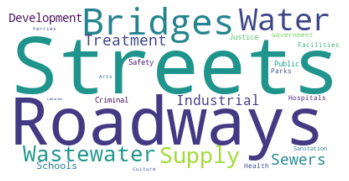

In [7]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
#Now a 4 plot graphs with over budget/Under Budget //Late //Not Late

In [9]:
df_late=df[df["Total Schedule Changes"]>0]
df_early_ontime=df[df["Total Schedule Changes"]<=0]
df_over_budget=df[df["Total Budget Changes"]>0]
df_under_budget=df[df["Total Budget Changes"]<=0]

print(df_late.shape[0],df_early_ontime.shape[0])
print(df_over_budget.shape[0],df_under_budget.shape[0])

1726 460
1558 636


In [13]:
def generate(column_name='',stopwords=['Street','Avenue','and','of','to','at','in','over','the','will','is','from']):
    fig,ax=plt.subplots(2,2,figsize=(20,10))
    
    text_late=', '.join(df_late[column_name].dropna().astype(str).to_list())
    text_early_ontime=', '.join(df_early_ontime[column_name].dropna().astype(str).to_list())
    text_over_budget=', '.join(df_over_budget[column_name].dropna().astype(str).to_list())
    text_under_budget=', '.join(df_under_budget[column_name].dropna().astype(str).to_list())
    
    for i,text in enumerate([text_late,text_early_ontime]):
        wordcloud = WordCloud(stopwords=set(stopwords), max_words=300, background_color="white",collocations=False).generate(text)
        plt.figure()
        ax[i,0].imshow(wordcloud, interpolation="bilinear");
        ax[i,0].axis("off");
    for i,text in enumerate([text_late,text_early_ontime]):
        wordcloud = WordCloud(stopwords=set(stopwords), max_words=300, background_color="white",collocations=False).generate(text)
        plt.figure()
        ax[i,1].imshow(wordcloud, interpolation="bilinear");
        ax[i,1].axis("off");


    ax[0,0].set_title("Late", fontsize=20);
    ax[1,0].set_title("Early Or On Time", fontsize=20);
    ax[0,1].set_title("Over Budget", fontsize=20);
    ax[1,1].set_title("Under or On Budget", fontsize=20);

    fig.suptitle("Word clouds for the Columns : %s"%column_name, fontsize=50);
    return fig,ax



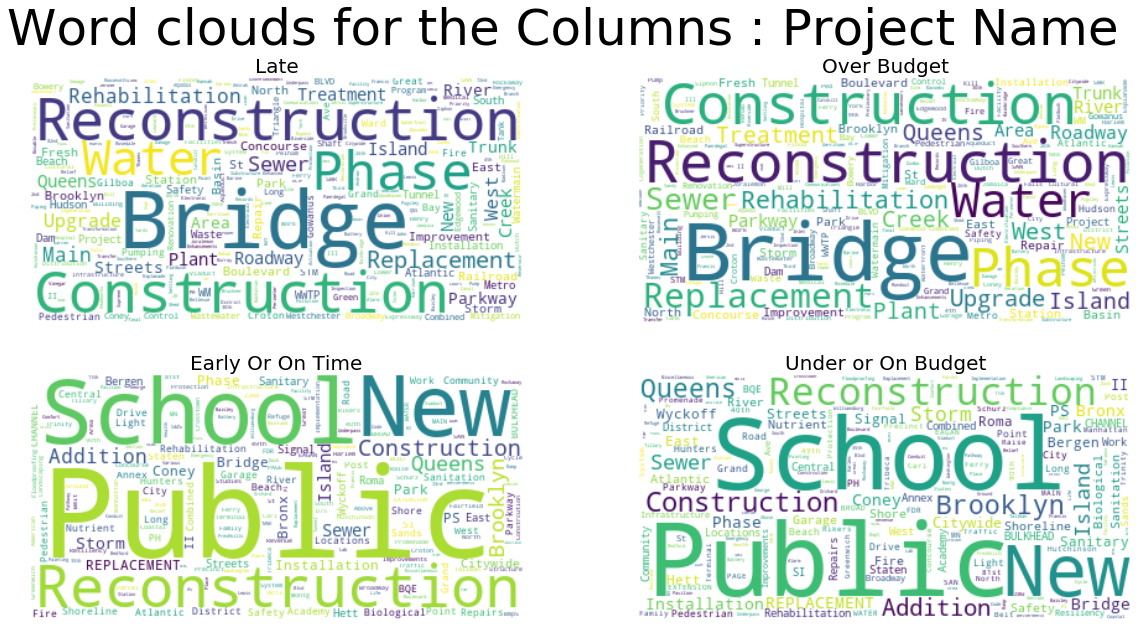

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
fig,ax=generate(column_name='Project Name');


In [16]:
fig.savefig('../../Results_imgs/Text_Analysis_Project_Name.png')

### Commentary Text Analysis on the Project Name :

We see a clear distinction between Late/Over Budget and Early/Under Budget. Late and Over Budget projects seem to be in more cases projects around constructions and reconstructions (with some mentions of water/bridges/sewers/creeks) whereas Early and Under Budget projects seem to revolve more heavily around Public and School.


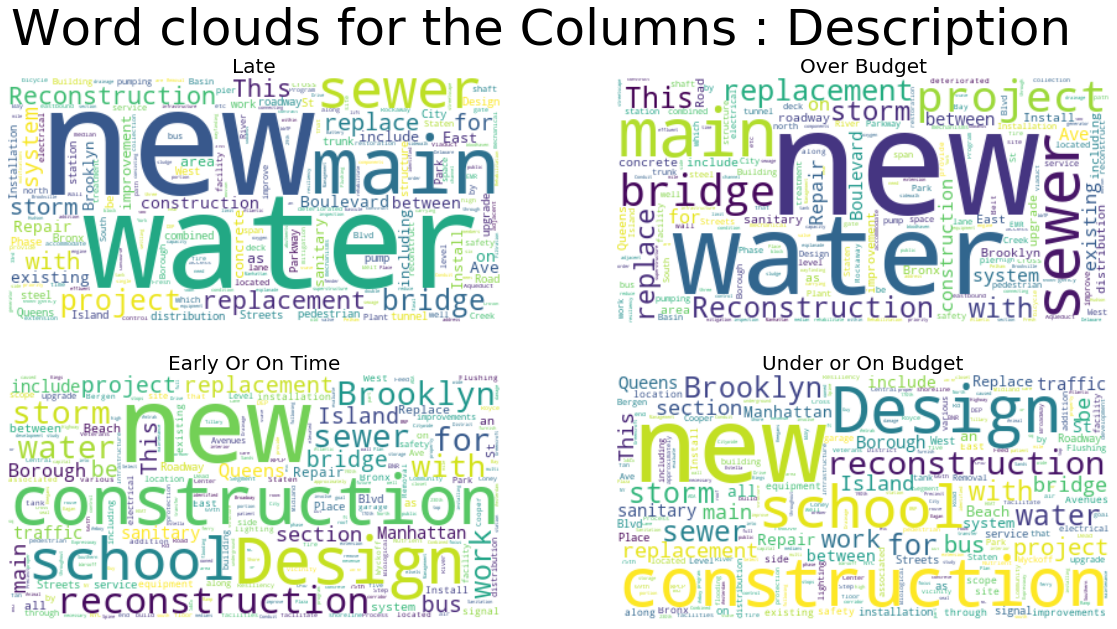

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
fig,ax=generate(column_name='Description');

